# Dataset task

## Explore the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/ii/Desktop/SATVRN/study/Andrei/dataset/test_p.csv')

In [3]:
# Check the data and types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                63 non-null     int64 
 1   order_id               63 non-null     int64 
 2   product_id             63 non-null     int64 
 3   product_name           63 non-null     object
 4   category               63 non-null     object
 5   price                  63 non-null     int64 
 6   quantity               63 non-null     int64 
 7   date                   63 non-null     object
 8   country                63 non-null     object
 9   payment_method         63 non-null     object
 10  is_returning_customer  63 non-null     bool  
 11  purchase_value         63 non-null     int64 
dtypes: bool(1), int64(6), object(5)
memory usage: 5.6+ KB


In [4]:
# Check distribution of the numerical data
df.describe()

,user_id,order_id,product_id,price,quantity,purchase_value
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,5.333333,1032.000000,111.047619,323.809524,1.047619,328.571429
std,2.929274,18.330303,6.189034,319.038013,0.214669,316.354523
min,1.000000,1001.000000,101.000000,20.000000,1.000000,20.000000
25%,3.000000,1016.500000,106.000000,100.000000,1.000000,100.000000
50%,5.000000,1032.000000,111.000000,200.000000,1.000000,200.000000
75%,8.000000,1047.500000,116.000000,400.000000,1.000000,400.000000
max,10.000000,1063.000000,123.000000,1200.000000,2.000000,1200.000000


In [5]:
df.head(10)

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30
5,6,1006,106,Smartphone,Electronics,800,1,2020-01-21,USA,Credit Card,False,800
6,7,1007,107,Tablet,Electronics,400,1,2020-01-22,Canada,Debit Card,False,400
7,8,1008,108,Speaker,Electronics,150,1,2020-01-23,USA,PayPal,False,150
8,9,1009,109,Monitor,Electronics,250,1,2020-01-24,UK,Credit Card,False,250
9,10,1010,110,Webcam,Electronics,50,1,2020-01-25,Germany,Credit Card,False,50


In [6]:
# Show duplicates if exist
df[df.duplicated() == True]

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value


### Calculate the average cost of order by month for the last 3 years

In [7]:
# Convert a column with date to the datetime type
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Create a list with the considered period of last 3 years
max_year = max(df['date'].dt.year)
min_year = max_year - 2
year_list = list(range(min_year, max_year+1))
year_list

[2018, 2019, 2020]

In [9]:
# Calculate the average cost of order by month for the last 3 years
yearly_avg_cost = (df.pivot_table(index=df['date'].dt.strftime('%b'), #shorten the names of months
                                  columns=df['date'].dt.year, 
                                  values='purchase_value',
                                  aggfunc='mean')
                   )

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

yearly_avg_cost = yearly_avg_cost.reindex(index=month_order, columns=year_list)

yearly_avg_cost.index.names = ['month/year']

yearly_avg_cost

date,2018,2019,2020
month/year,,,
Jan,NaN,NaN,315.0
Feb,NaN,NaN,315.0
Mar,NaN,NaN,315.0
Apr,NaN,NaN,365.0
May,NaN,NaN,365.0
Jun,NaN,NaN,365.0
Jul,NaN,NaN,100.0
Aug,NaN,NaN,NaN
Sep,NaN,NaN,NaN


### Divide users by three groups according to total purchases: low, medium and high

In [10]:
labels = ['low', 'medium', 'high']   

In [11]:
# Create a dataframe for the region of America
america_region = ['USA', 'Canada']

df_america = df[(df['country'].isin(america_region))]

df_america.describe()

,user_id,order_id,product_id,price,quantity,purchase_value
count,39.000000,39.000000,39.000000,39.000000,39.0,39.000000
mean,4.307692,1032.000000,110.461538,401.538462,1.0,401.538462
std,2.657203,18.970892,6.455704,365.380396,0.0,365.380396
min,1.000000,1001.000000,101.000000,20.000000,1.0,20.000000
25%,2.000000,1016.500000,106.000000,150.000000,1.0,150.000000
50%,3.000000,1032.000000,111.000000,300.000000,1.0,300.000000
75%,7.000000,1047.500000,116.000000,500.000000,1.0,500.000000
max,8.000000,1063.000000,123.000000,1200.000000,1.0,1200.000000


In [12]:
# Divide the customers into the three groups by purchase_value according to the distribution of the values
bins_am = [0, 150, 500, 1200]

df_america['us_group'] = pd.cut(df_america['purchase_value'], bins=bins_am, labels=labels)

df_america.head()

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,us_group
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,high
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,low
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,low
5,6,1006,106,Smartphone,Electronics,800,1,2020-01-21,USA,Credit Card,False,800,high
6,7,1007,107,Tablet,Electronics,400,1,2020-01-22,Canada,Debit Card,False,400,medium


In [13]:
# Create a dataframe for the region of Europe
df_europe = df[~(df['country'].isin(america_region))]

df_europe.describe()

,user_id,order_id,product_id,price,quantity,purchase_value
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.00000
mean,7.000000,1032.00000,112.000000,197.500000,1.125000,210.00000
std,2.604344,17.63889,5.733199,164.058579,0.337832,159.72803
min,4.000000,1004.00000,104.000000,30.000000,1.000000,30.00000
25%,4.750000,1018.00000,108.000000,87.500000,1.000000,87.50000
50%,7.000000,1032.00000,112.000000,125.000000,1.000000,175.00000
75%,9.250000,1046.00000,116.000000,287.500000,1.000000,287.50000
max,10.000000,1060.00000,120.000000,500.000000,2.000000,500.00000


In [14]:
# Divide the customers into the three groups by purchase_value according to the distribution of the values
bins_eu = [0, 90, 290, 500]

df_europe['eu_group'] = pd.cut(df['purchase_value'], bins=bins_eu, labels=labels)

df_europe.head()

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,eu_group
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,medium
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,low
8,9,1009,109,Monitor,Electronics,250,1,2020-01-24,UK,Credit Card,False,250,medium
9,10,1010,110,Webcam,Electronics,50,1,2020-01-25,Germany,Credit Card,False,50,low
13,4,1014,104,Headphones,Electronics,100,2,2020-02-19,UK,Credit Card,True,200,medium


### Analyze how the number of orders of returning customers per quarter has changed in the last 3 years

In [15]:
# Create a pivot table to show the change in the number of orders of returning customers 
quarter_list = [1, 2, 3, 4]

multi_index = pd.MultiIndex.from_product([year_list, quarter_list], names=['year', 'quarter'])

df_rep_cust = df[df['is_returning_customer'] == True]
df_rep_cust['quarter'] = df_rep_cust['date'].dt.quarter
df_rep_cust['year'] = df_rep_cust['date'].dt.year

change_per_quarter = (df_rep_cust.pivot_table( 
                                  index=['year', 'quarter'], 
                                  values='order_id', 
                                  aggfunc='count')
                      ).rename(columns={'order_id': 'orders_count'})

change_per_quarter = change_per_quarter.reindex(index=multi_index)

# Use function to display the difference in percentage between quarters
change_per_quarter['pct_change'] = change_per_quarter['orders_count'].pct_change() * 100

change_per_quarter

orders_count  pct_change
year quarter                          
2018 1                 NaN         NaN
     2                 NaN         NaN
     3                 NaN         NaN
     4                 NaN         NaN
2019 1                 NaN         NaN
     2                 NaN         NaN
     3                 NaN         NaN
     4                 NaN         NaN
2020 1                20.0         NaN
     2                30.0        50.0
     3                 3.0       -90.0
     4                 NaN         0.0

### Comparative analysis of the popularity of product categories in different countries

In [16]:
# Create a pivot table to analyze the popularity of product categories in different countries
cat_pop = (df.pivot_table( 
                           index=['country', 'category'], 
                           values='order_id', 
                           aggfunc='count')
                      ).rename(columns={'order_id': 'orders_count'})
cat_pop

orders_count
country category                     
Canada  Electronics                12
        Home Appliances             1
Germany Electronics                12
UK      Electronics                12
USA     Electronics                24
        Home Appliances             2

### Calculate the average cost of order of each group

#### America

In [17]:
(
 df_america.groupby(['us_group'])['purchase_value']
        .mean()
        .rename("mean_pv")
)

us_group
low         80.000000
medium     316.666667
high      1000.000000
Name: mean_pv, dtype: float64

#### Europe

In [18]:
(
 df_europe.groupby(['eu_group'])['purchase_value']
          .mean()
          .rename("mean_pv")
)

eu_group
low        40.0
medium    175.0
high      450.0
Name: mean_pv, dtype: float64

### Calculate the percentage of returning customers in each group

#### America

In [19]:
(
 df_america.groupby(['us_group'])['is_returning_customer'] 
          .mean() * 100
         ).rename("pct_rc").round(2)

us_group
low       75.00
medium    94.44
high      77.78
Name: pct_rc, dtype: float64

#### Europe

In [20]:
(
 df_europe.groupby(['eu_group'])['is_returning_customer'] 
          .mean() * 100
         ).rename("pct_rc").round(2)

eu_group
low        66.67
medium     83.33
high      100.00
Name: pct_rc, dtype: float64

### Calculate the categories of products that are most popular with users of each group

In [21]:
# Write a function to display the most popular category within the groups
def calc_cat_pop(df, group_columns, count_column):
    return (
        df.groupby(group_columns)[count_column]
          .count()
          .rename('orders_count')
    )

# Write a function to display the most popular products within the groups
def calc_prod_pop(df, group_columns, count_column):
    return (
        df.groupby(group_columns)[count_column]
          .count()
          .rename('orders_count')
          .sort_values(ascending=False)
          .sort_index(level=0, sort_remaining=False)
    )

#### America

In [22]:
# The most popular categories
am_cat_pop = calc_cat_pop(df_america, ['us_group', 'category'], 'order_id')

am_cat_pop

us_group  category       
low       Electronics         9
          Home Appliances     3
medium    Electronics        18
          Home Appliances     0
high      Electronics         9
          Home Appliances     0
Name: orders_count, dtype: int64

In [23]:
# The most popular products
am_prod_pop = calc_prod_pop(df_america, ['us_group', 'product_name'], 'order_id')

am_prod_pop

us_group  product_name 
low       Keyboard         3
          Mouse            3
          Speaker          3
          Toaster          1
          Blender          1
          Coffee Maker     1
          Action Camera    0
          Tablet           0
          TV               0
          Smartwatch       0
          Smartphone       0
          Projector        0
          Laptop           0
          Game Console     0
          Camera           0
medium    Camera           3
          Action Camera    3
          Smartwatch       3
          Tablet           3
          Game Console     3
          Projector        3
          Toaster          0
          Mouse            0
          TV               0
          Speaker          0
          Smartphone       0
          Laptop           0
          Keyboard         0
          Coffee Maker     0
          Blender          0
high      Smartphone       3
          Laptop           3
          TV               3
          Blender  

#### Europe

In [24]:
# The most popular categories
eu_cat_pop = calc_cat_pop(df_europe, ['eu_group', 'category'], 'order_id')

eu_cat_pop

eu_group  category   
low       Electronics     6
medium    Electronics    12
high      Electronics     6
Name: orders_count, dtype: int64

In [25]:
# The most popular products
eu_prod_pop = calc_prod_pop(df_europe, ['eu_group', 'product_name'], 'order_id')

eu_prod_pop

eu_group  product_name   
low       Charger            3
          Webcam             3
          VR Headset         0
          Monitor            0
          Drone              0
          Headphones         0
          Gaming Headset     0
          Fitness Tracker    0
medium    Monitor            3
          Gaming Headset     3
          Fitness Tracker    3
          Headphones         3
          Charger            0
          Drone              0
          VR Headset         0
          Webcam             0
high      VR Headset         3
          Drone              3
          Charger            0
          Fitness Tracker    0
          Gaming Headset     0
          Headphones         0
          Monitor            0
          Webcam             0
Name: orders_count, dtype: int64

### Create a plot with the number of orders of returning customers per quarter

<AxesSubplot:xlabel='year,quarter'>

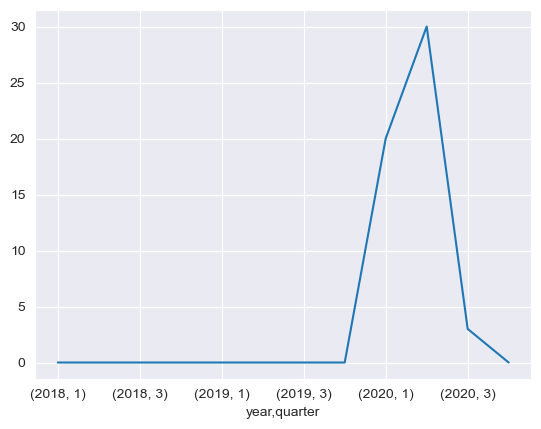

In [26]:
change_per_quarter['orders_count'].plot(kind='line', stacked=True)

### Create a diagram with the popularity of product categories in different countries

In [27]:
# Write a function to display a bar plot divided into groups by a color
def plot(df, column, x, xlabel):
    colors = {'low': 'blue', 'medium': 'orange', 'high': 'green'}
    df = df.reset_index()
    df['color'] = df[column].map(colors)
    fig = df.plot(kind='bar',
                  x=x,
                  y='orders_count',
                  stacked=True, 
                  figsize=(12,8), 
                  xlabel=xlabel, 
                  ylabel='order_count',
                  color=df['color'])
    return fig

#### America

<AxesSubplot:xlabel='group, category', ylabel='order_count'>

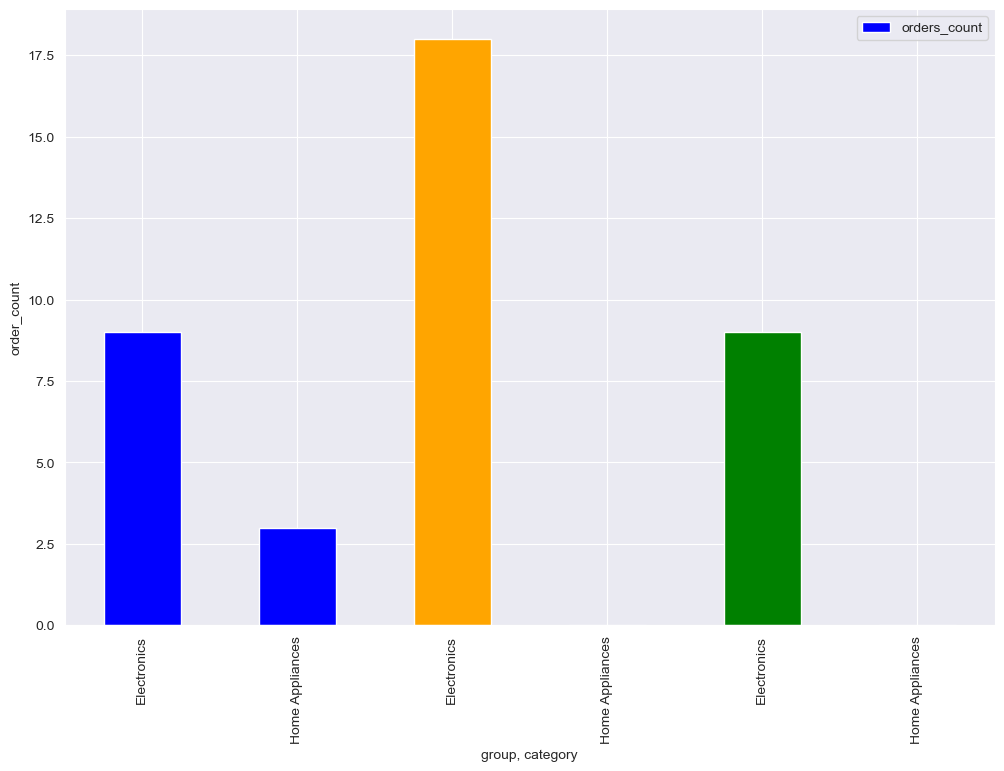

In [28]:
# A bar plot with the most popular categories
plot(am_cat_pop, 'us_group', 'category', 'group, category')

<AxesSubplot:xlabel='group, name', ylabel='order_count'>

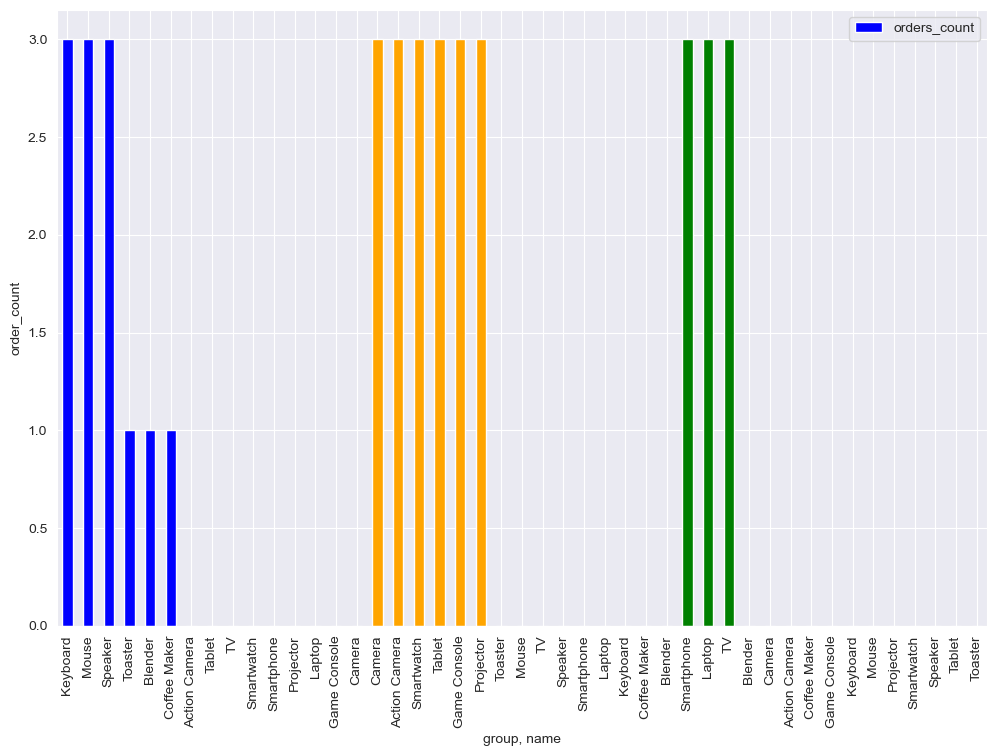

In [29]:
# A bar plot with the most popular products
plot(am_prod_pop, 'us_group', 'product_name', 'group, name')

#### Europe

<AxesSubplot:xlabel='group, category', ylabel='order_count'>

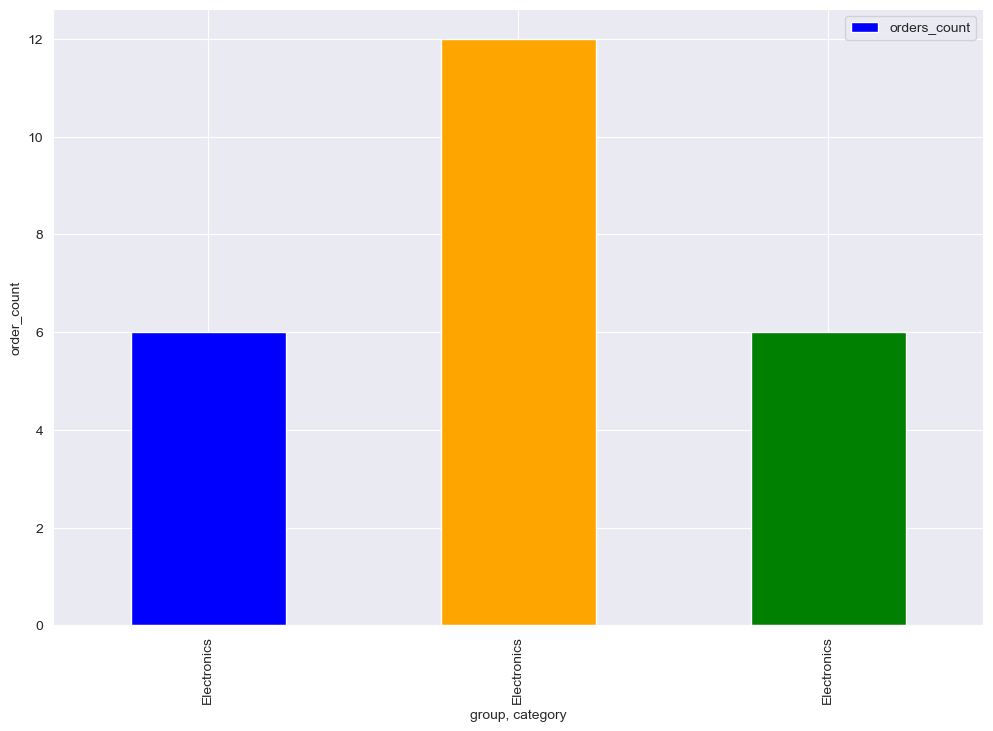

In [30]:
# A bar plot with the most popular categories
plot(eu_cat_pop, 'eu_group', 'category', 'group, category')

<AxesSubplot:xlabel='group, name', ylabel='order_count'>

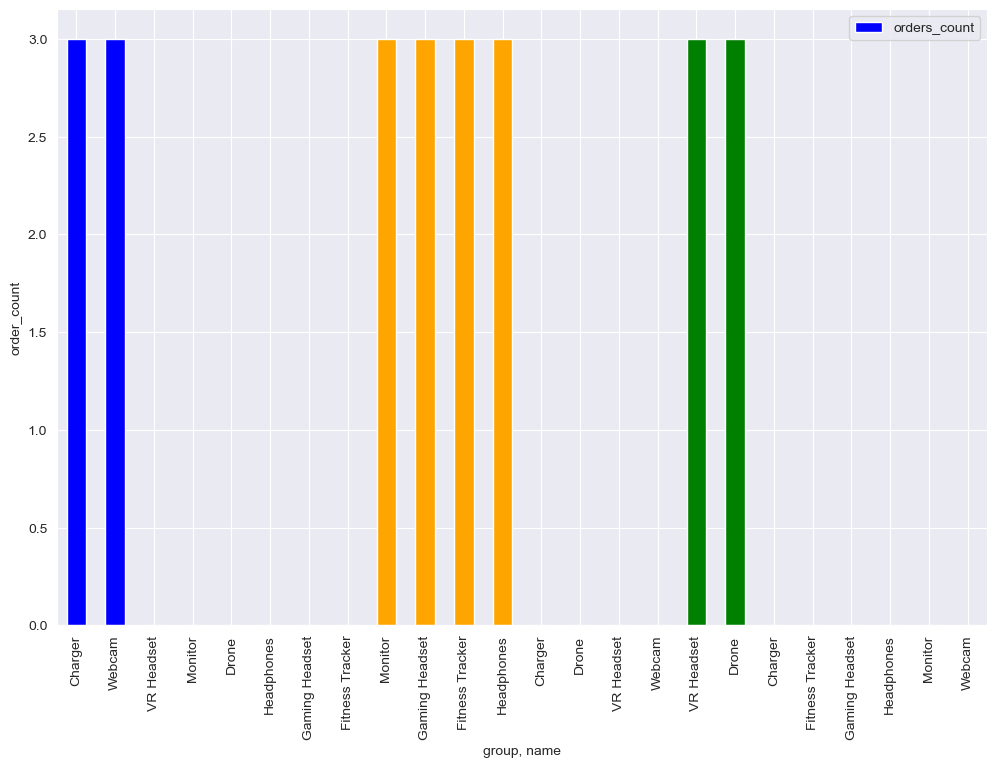

In [31]:
# A bar plot with the most popular products
plot(eu_prod_pop, 'eu_group', 'product_name', 'group, name')